All points within control limits.


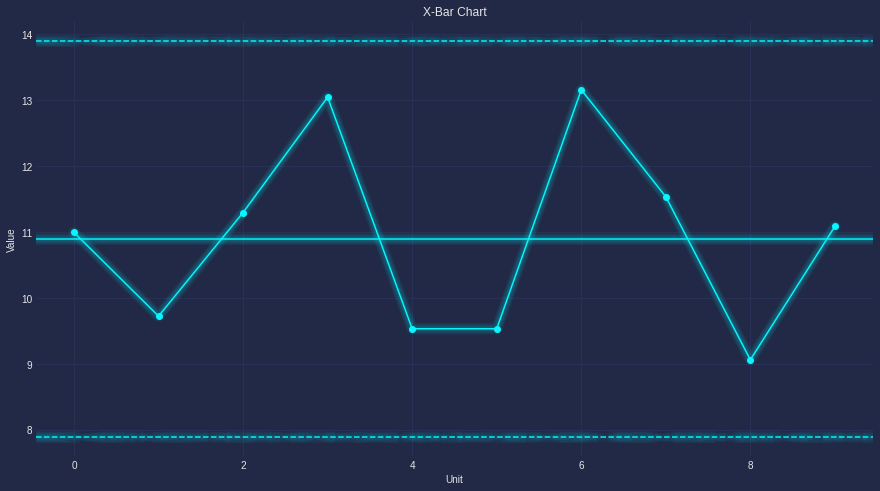

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import statistics
plt.style.use("cyberpunk")

# Set random seed
np.random.seed(42)

# Create dummy data
x = pd.Series(np.random.normal(loc=10, scale=2, size=10))

# Define list variable for moving ranges
MR = [np.nan]

# Get and append moving ranges
i = 1
for data in range(1, len(x)):
    MR.append(abs(x[i] - x[i-1]))
    i += 1

# Convert list to pandas Series objects    
MR = pd.Series(MR)

# Concatenate mR Series with and rename columns
data = pd.concat([x,MR], axis=1).rename(columns={0:"x", 1:"mR"})

# Plot x and mR charts
fig, axs = plt.subplots(figsize=(15,8), sharex=True)

# x chart
axs.plot(data['x'], linestyle='-', marker='o')
axs.axhline(statistics.mean(data['x']))
axs.axhline(statistics.mean(data['x'])+3, linestyle = 'dashed')
axs.axhline(statistics.mean(data['x'])-3, linestyle = 'dashed')
axs.set_title('X-Bar Chart')
axs.set(xlabel='Unit', ylabel='Value')

mplcyberpunk.make_lines_glow()


# Validate points out of control limits for x chart
i = 0
control = True
for unit in data['x']:
    if unit > statistics.mean(data['x'])+3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128 or unit < statistics.mean(data['x'])-3*statistics.mean(data['mR'][1:len(data['mR'])])/1.128:
        print('Unit', i, 'out of cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')